In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the data
path = "/content/drive/MyDrive/Data_set/ML project/heart_disease_uci.csv"
data = pd.read_csv(path)
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Data Preprocessing

In [ ]:
# Handle missing values (replace with mode for categorical and median for numerical columns)
for column in data.columns:
    if data[column].dtype == 'object':
         data[column] = data[column].fillna(data[column].mode()[0])
    elif data[column].isnull().any():
        data[column] = data[column].fillna(data[column].median())

# Convert 'sex' to numerical
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

# Define categorical and numerical features
categorical_features = ['dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Ordinal encode 'slope'
ordinal_encoding_mapping = ['upsloping', 'flat', 'downsloping']
encoder = OrdinalEncoder(categories=[ordinal_encoding_mapping])
data['slope'] = encoder.fit_transform(data[['slope']])

# One-Hot encode categorical features
data = pd.get_dummies(data, columns=['dataset', 'cp', 'fbs','restecg', 'exang', 'thal'], drop_first=True)


# Feature scaling
ct = make_column_transformer(
    (StandardScaler(), numerical_features),
    remainder='passthrough'
)

scaled_data = ct.fit_transform(data.drop('num', axis=1))
scaled_df = pd.DataFrame(scaled_data, columns = ct.get_feature_names_out())
X = scaled_df
y = data['num']

<ipython-input-3-fafc89a26a9f>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].fillna(data[column].mode()[0])


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation
model = LogisticRegression(max_iter = 1000)

# Model Training
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Prediction
y_pred = model.predict(X_test)

In [ ]:
#Model Evaluation
print("\nModel Coefficients:")
print(pd.DataFrame(model.coef_, columns = X.columns))
print("\nModel Intercept:", model.intercept_)

mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0) # handle 0 division

print("\nMean Squared Error:", mse)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)


Model Coefficients:
   standardscaler__age  standardscaler__trestbps  standardscaler__chol  \
0            -0.018519                 -0.086707             -0.064882   
1            -0.122633                 -0.023695              0.061098   
2             0.151377                 -0.057370             -0.102664   
3             0.140406                  0.042781              0.138960   
4            -0.150631                  0.124991             -0.032513   

   standardscaler__thalch  standardscaler__oldpeak  standardscaler__ca  \
0                0.158175                -0.764612           -0.650558   
1                0.235416                -0.226330           -0.027841   
2                0.040730                 0.046569            0.153787   
3               -0.299324                 0.336121            0.212817   
4               -0.134997                 0.608252            0.311795   

   remainder__id  remainder__sex  remainder__slope  \
0      -0.004261        0.936835   

Visualization

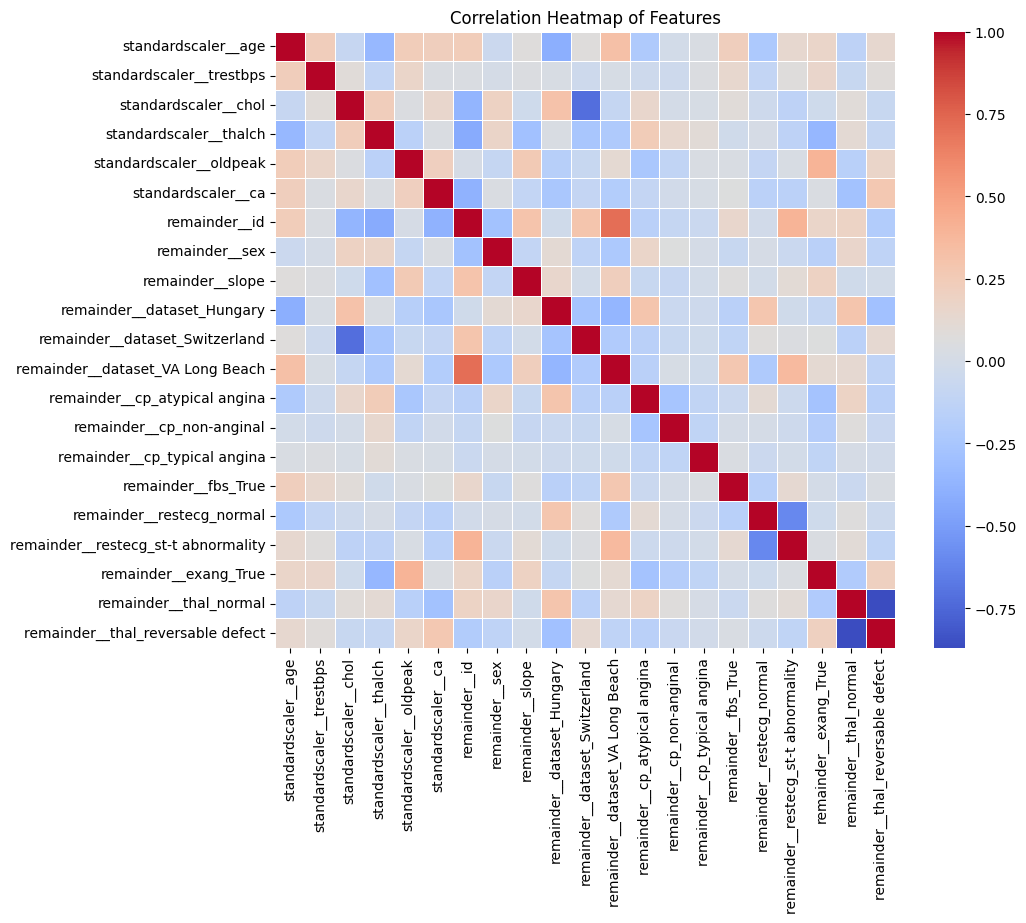

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


***Insights & Stats***

Descriptive Statistics of Target Variable:
count    920.000000
mean       0.995652
std        1.142693
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: num, dtype: float64

Distribution of Target Variable:


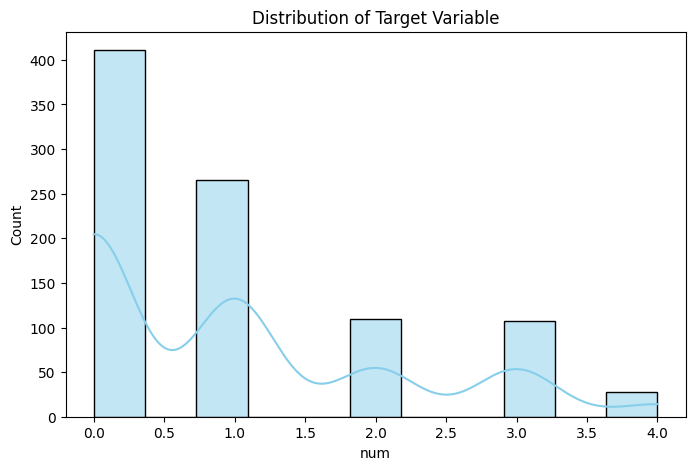

In [ ]:
# Insights and Stats

print("\n***Insights & Stats***")
print("\nDescriptive Statistics of Target Variable:")
print(y.describe())


print("\nDistribution of Target Variable:")
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, color='skyblue')
plt.title("Distribution of Target Variable")
plt.show()